In [89]:
import MDAnalysis as mda
import MDAnalysis.transformations
import numpy as np
import nglview as nv
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
def get_universe(file_path: str) -> tuple:
    """
    get PARM7, DCD files and return universe
    """
    topology = file_path + "somd.prm7"
    trajectory = file_path + "traj000000002.dcd"
    if not os.path.isfile(trajectory):
        trajectory = file_path + "traj000000001.dcd"
    return mda.Universe(topology, trajectory, topology_format="PARM7")


def running_avg(data: np.ndarray, sample_size: int, window:int) -> np.ndarray:
    """
    calculate running average
    """
    sum_i = 0
    cumulative_sum = []
    for i in range(sample_size):
        sum_i += data[i]
        cumulative_sum.append(sum_i)
    cumulative_sum = np.array(cumulative_sum)    
    running_avg = (cumulative_sum[window:] - cumulative_sum[:-window]) / float(window)
    return running_avg



# C-H bond length lambda 0

In [69]:
path = f"../outputs/SOMD/lig_h_1~lig_h_16/bound/lambda_0.0000/"
universe = get_universe(path)
workflow = [mda.transformations.unwrap(universe.atoms)]
universe.trajectory.add_transformations(*workflow)
ligand = universe.select_atoms("resname LIG")

In [70]:
universe.trajectory[0]
carbon = ligand.select_atoms("name C17")
dummy = ligand.select_atoms("name C2")
bond_group = carbon + dummy
bond_length_1 = bond_group.bond.length()
print(bond_length_1)


1.5410713573071275


In [71]:
n_frames = universe.trajectory.n_frames
bond_lengths_0 = []
for frame in range(n_frames):
    universe.trajectory[frame]
    carbon = ligand.select_atoms("name C17")
    dummy = ligand.select_atoms("name C2")
    bond_group = carbon + dummy
    bond_lengths_0.append(bond_group.bond.length())


Text(0, 0.5, 'C-H bond length')

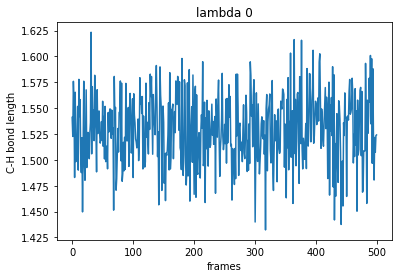

In [72]:
frames = np.arange(0, n_frames)
plt.plot(frames, bond_lengths_0)
plt.title("lambda 0")
plt.xlabel("frames")
plt.ylabel("C-H bond length")

In [57]:
nv.show_mdanalysis(ligand)

NGLWidget(max_frame=499)

# C-H bond length lambda 10

In [73]:
path = f"../outputs/SOMD/lig_h_1~lig_h_16/bound/lambda_1.0000/"
universe = get_universe(path)
workflow = [mda.transformations.unwrap(universe.atoms)]
universe.trajectory.add_transformations(*workflow)
ligand_10 = universe.select_atoms("resname LIG")

In [74]:
universe.trajectory[-1]
carbon = ligand_10.select_atoms("name C17")
dummy = ligand_10.select_atoms("name C2")
bond_group = carbon + dummy
bond_length_10 = bond_group.bond.length()
print(bond_length_10)

1.071323018022689


In [76]:
n_frames = universe.trajectory.n_frames
bond_lengths_10 = []
for frame in range(n_frames):
    universe.trajectory[frame]
    carbon = ligand_10.select_atoms("name C17")
    dummy = ligand_10.select_atoms("name C2")
    bond_group = carbon + dummy
    bond_lengths_10.append(bond_group.bond.length())

Text(0, 0.5, 'C-H bond length')

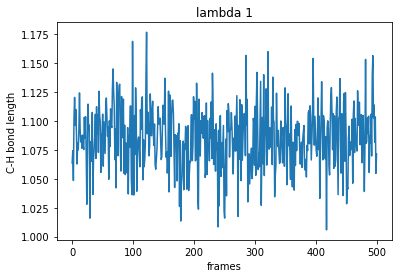

In [77]:
frames = np.arange(0, n_frames)
plt.plot(frames, bond_lengths_10)
plt.title("lambda 1")
plt.xlabel("frames")
plt.ylabel("C-H bond length")

In [79]:
times = [universe.trajectory[frame].time for frame in range(n_frames)]

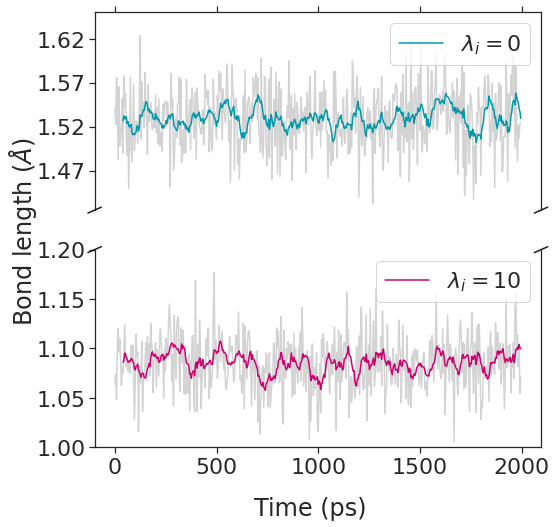

In [145]:
running_avg_0 = running_avg(bond_lengths_0, len(bond_lengths_0), 10)
running_avg_10 = running_avg(bond_lengths_10, len(bond_lengths_10), 10)

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
ax.plot(times, bond_lengths_0, color="lightgrey")
ax.plot(times[10:], running_avg_0, color="#0099AB", label=r"$\lambda_i=0$")
ax2.plot(times, bond_lengths_10, color="lightgrey")
ax2.plot(times[10:], running_avg_10, color=(208/255, 0/255, 111/255), label=r"$\lambda_i=10$")
ax2.plot(times, bond_lengths_0, color="lightgrey")
ax2.plot(times[10:], running_avg_0, color="#0099AB")
ax.plot(times, bond_lengths_10, color="lightgrey")
ax.plot(times[10:], running_avg_10, color=(208/255, 0/255, 111/255))

ax.set_ylim(1.425, 1.650)
ax2.set_ylim(1, 1.2)
ax.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax.xaxis.tick_top()
diagonal = 0.015
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((-diagonal, +diagonal), (-diagonal, +diagonal), **kwargs)
ax.plot((1-diagonal, 1+diagonal), (-diagonal, +diagonal), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-diagonal, +diagonal), (1-diagonal, 1+diagonal), **kwargs)
ax2.plot((1-diagonal, 1+diagonal), (1-diagonal, 1+diagonal), **kwargs)
ax.yaxis.set_ticks(np.arange(1.47, 1.65, 0.05))


ax.legend(loc="upper right")
ax2.legend(loc="upper right")

fig.text(0.5, 0.02, "Time (ps)", ha="center", va="center")
fig.text(0.001, 0.5, r"Bond length ($\AA$)", ha="center", va="center", rotation="vertical")
# fig.tight_layout()
fig.savefig("../../plots/bond_length_plot.pdf")


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
